In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys 
sys.path.append('/home1/efeghhi/ripple_memory/analysis_code/')
from load_data import *
from analyze_data import *
sys.path.append('/home1/efeghhi/ripple_memory/analysis_code/pac_analyses/')
from load_data_numpy import load_data_np
from comodulogram import remove_session_string, get_filtered_signal
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import decimate, resample

from mne.time_frequency import tfr_array_morlet
from scipy.signal import hilbert


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os
new_directory = '/home1/efeghhi/ripple_memory/analysis_code/dataset_info/'
os.chdir(new_directory)

In [5]:
# load data
encoding_mode = 1
region_name = ['HPC']
subregion = ['ca1']
dd_trials = load_data_np(encoding_mode, region_name=region_name, subregion=subregion)

Loading data
LOADING DATA FROM:  HPC
order: C


In [6]:
dd_trials.keys()

dict_keys(['ripple', 'clust', 'correct', 'position', 'list_num', 'subj', 'sess', 'elec_names', 'elec_labels', 'serial_pos', 'raw', 'elec_by_elec_correlation', 'trial_by_trial_correlation', 'elec_ripple_rate_array', 'category_array', 'clust_int'])

In [7]:
# let's chraracterize how many trials we have from each participants 
subjects = dd_trials['subj']
unq_subjects = np.unique(subjects)
clust = dd_trials['clust_int']
num_trials_subjects = []
num_clust_trials_subjects = []
num_not_clust_trials_subjects = []

for s in unq_subjects:
    s_idxs = np.argwhere(subjects==s)
    clust_s = clust[s_idxs]
    num_clust = np.argwhere(clust_s > 0).shape[0]
    num_not_clust = np.argwhere(clust_s < 0).shape[0]
    num_trials_subjects.append(s_idxs.shape[0])
    num_clust_trials_subjects.append(num_clust)
    num_not_clust_trials_subjects.append(num_not_clust)
    
num_clust_trials_subjects = np.array(num_clust_trials_subjects)
num_not_clust_trials_subjects = np.array(num_not_clust_trials_subjects)

Text(0, 0.5, 'Number of clustered trials')

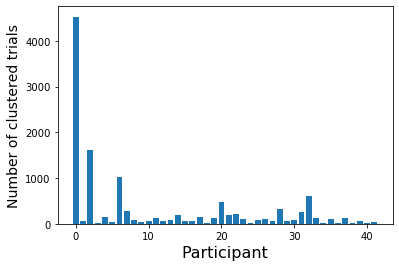

In [8]:
plt.bar(np.arange(len(unq_subjects)), num_clust_trials_subjects)
plt.xlabel("Participant", fontsize=16)
plt.ylabel("Number of clustered trials", fontsize=14)

In [14]:
thresh = 15
low_trial_subjects_idxs = np.argwhere((num_clust_trials_subjects < thresh) | (num_not_clust_trials_subjects < thresh))
exclude_subjects = unq_subjects[low_trial_subjects_idxs]
np.save('participants_low_trials', exclude_subjects)